# Processing Dataset

- Dataset - https://www.kaggle.com/c/dog-breed-identification/data
- Import label.csv file with pandas
- Accessing each image present in the train folder
- Renaming each image with the dobgs breed using label.csv and creating folder for each breed
- This model only detects 10 breeds : beagle, chihuahua, doberman, french_bulldog, golden_retriever, malamute, pug, saint_bernard, scottish_deerhound, tibetan_mastiff.

In [23]:
import pandas as pd

labels = pd.read_csv("/Users/harshit/Downloads/dog-breed-classifier/labels.csv")


import os

# Train
dirname = "/Users/harshit/Downloads/dog-breed-classifier/train"

i = 0
if os.path.isdir(dirname):
    for filename in os.listdir(dirname):
        new_name = labels.loc[labels['id'] == filename[:-4]]
        if not new_name.empty :
        
            if not os.path.exists(os.path.join(dirname, str(new_name["breed"].values[0]))):
                os.makedirs(os.path.join(dirname, str(new_name["breed"].values[0])))

            os.rename(dirname + "/" + filename, dirname + "/" + str(new_name["breed"].values[0]) + "/" +str(new_name["breed"].values[0])+ str(i)+".jpg")
            i+=1
           
# Test

dirname = "/Users/harshit/Downloads/dog-breed-classifier/test"

i = 0
if os.path.isdir(dirname):
    for filename in os.listdir(dirname):
        new_name = labels.loc[labels['id'] == filename[:-4]]
        if not new_name.empty :
        
            if not os.path.exists(os.path.join(dirname, str(new_name["breed"].values[0]))):
                os.makedirs(os.path.join(dirname, str(new_name["breed"].values[0])))

            os.rename(dirname + "/" + filename, dirname + "/" + str(new_name["breed"].values[0]) + "/" +str(new_name["breed"].values[0])+ str(i)+".jpg")
            i+=1
           
        

# Importing Libraries


In [2]:
import tensorflow as tf
import pydot
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

# Creating Classidier Model

- Using Tensorflow importing exsisting ResNet50 V2 Model and using it as base model
- Loading the exsisting model with pretrained Imagenet model weights
- Freezing the base model
- Adding Average Pooling, Batch normalization and Dropout rate to custom output layer
- Concating base layer and output layer
- Priting model summary

In [19]:
# Initialising the CNN
classifier_base = tf.keras.applications.ResNet50V2(input_shape = (64,64,3),
    include_top=False, weights="imagenet"
)

# Compiling the CNN
classifier_base.trainable = False

x = classifier_base.output


flattened = tf.keras.layers.Flatten()(x)

fc1 = tf.keras.layers.Dense(1024, activation='relu', name="AddedDense1")(flattened)

fc2 = tf.keras.layers.Dense(512, activation='relu', name="AddedDense2")(fc1)

fc3 = tf.keras.layers.Dense(256, activation='relu', name="AddedDense3")(fc2)

fc4 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense4")(fc3)

fc5 = tf.keras.layers.Dense(10, activation='softmax', name="AddedDense5")(fc4)

classifier = tf.keras.models.Model(inputs=classifier_base.input, outputs=fc5)


classifier.summary()

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 34, 34, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

# Preparing training set using ImageDataGenerator

- Using ImageDataGenerator to preprocess images by rescaling them and creating batch size

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
 
training_set = train_datagen.flow_from_directory('/Users/harshit/Downloads/dog-breed-identification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 10
                                                 )

test_set = test_datagen.flow_from_directory('/Users/harshit/Downloads/dog-breed-identification/test',
                                            target_size = (64, 64),
                                            batch_size = 5)

Found 821 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


# Training Model 

- Training model on 150 epochs (50 + 100) burst
- Saving weights of the trained model

In [28]:
#loading previously saved model
#classifier = tf.keras.models.load_model('dog_breeder_resent50v2_10.h5')

classifier.fit(training_set, epochs = 150, validation_data = test_set)
classifier.save("dog_breeder_resent50v2_10.h5")


Epoch 1/10
83/83 [==============================] - 15s 186ms/step - loss: 0.3932 - accuracy: 0.8879 - val_loss: 0.1894 - val_accuracy: 0.9452
Epoch 2/10
83/83 [==============================] - 16s 190ms/step - loss: 0.4378 - accuracy: 0.8892 - val_loss: 0.5164 - val_accuracy: 0.8721
Epoch 3/10
83/83 [==============================] - 16s 189ms/step - loss: 0.6339 - accuracy: 0.8283 - val_loss: 0.2068 - val_accuracy: 0.9440
Epoch 4/10
83/83 [==============================] - 15s 186ms/step - loss: 0.3620 - accuracy: 0.9026 - val_loss: 0.2276 - val_accuracy: 0.9318
Epoch 5/10
83/83 [==============================] - 15s 185ms/step - loss: 0.4792 - accuracy: 0.8745 - val_loss: 0.2070 - val_accuracy: 0.9440
Epoch 6/10
83/83 [==============================] - 15s 186ms/step - loss: 0.3097 - accuracy: 0.8904 - val_loss: 0.2298 - val_accuracy: 0.9428
Epoch 7/10
83/83 [==============================] - 15s 187ms/step - loss: 0.2939 - accuracy: 0.9160 - val_loss: 0.1918 - val_accuracy: 0.9403

# Ploting model performance data

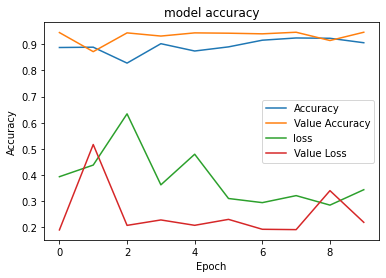

In [29]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Value Accuracy","loss", "Value Loss"])
plt.show()